## Project By: Christian Attorri, Geetanjali Sharma and Blaise Trapani

### Problem Statement:

Finding correlations between musical categories of Spotify songs. The ouput variable for this project is popularity and the rest of the features will be given as an input.

# 1. Data Preprocessing

In [36]:
#importing several libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [37]:
#load in data
df = pd.read_csv('complete_song_data.csv')

#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3542 non-null   int64  
 1   id                3542 non-null   object 
 2   name              3542 non-null   object 
 3   popularity        3542 non-null   int64  
 4   duration_ms       3542 non-null   int64  
 5   explicit          3542 non-null   int64  
 6   artists           3542 non-null   object 
 7   id_artists        3542 non-null   object 
 8   release_date      3542 non-null   object 
 9   danceability      3542 non-null   float64
 10  energy            3542 non-null   float64
 11  key               3542 non-null   int64  
 12  loudness          3542 non-null   float64
 13  mode              3542 non-null   int64  
 14  speechiness       3542 non-null   float64
 15  acousticness      3542 non-null   float64
 16  instrumentalness  3542 non-null   float64


In [38]:
#dropping the first column
df = df.drop(columns = 'Unnamed: 0')

df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spectro_filename,directory
0,5htJrzx9BOWrWWuTFRbehY,mama,27,237867,0,conniefrancis,['3EY5DxGdy7x4GelivOjS2Q'],1959-11-01,0.271,0.208,...,1,0.0314,0.90000,0.000107,0.334,0.112,87.551,3,Connie_Francis_-_Mama.png,/kaggle/input/billboard-hot-100-19602020-spect...
1,5TcEq6qNQJ7HXeTxwB3ZGB,walkingtoneworleans,45,118467,0,fatsdomino,['09C0xjtosNAIXP36wTnWxd'],1960-08-07,0.582,0.289,...,1,0.0465,0.51800,0.000000,0.107,0.743,80.750,4,Fats_Domino_-_Walking_To_New_Orleans.png,/kaggle/input/billboard-hot-100-19602020-spect...
2,555aGlegOjCZVH9ifvf61s,lonelyblueboy,39,135067,0,conwaytwitty,['7gi3jmwpUpNWdswT8eEprF'],1960-01-01,0.659,0.342,...,1,0.0353,0.77700,0.000013,0.248,0.677,112.878,3,Conway_Twitty_-_Lonely_Blue_Boy.png,/kaggle/input/billboard-hot-100-19602020-spect...
3,74wAhMoll6FsAKJOz3ch0D,havingaparty,38,157547,0,samcooke,['6hnWRPzGGKiapVX1UCdEAC'],1960-01-01,0.508,0.611,...,0,0.0418,0.54100,0.000000,0.340,0.733,123.380,4,Sam_Cooke_-_Having_a_Party.png,/kaggle/input/billboard-hot-100-19602020-spect...
4,0J1JdPuKQ1uUOueYLEU2BC,havingaparty,32,157296,0,samcooke,['6hnWRPzGGKiapVX1UCdEAC'],1962,0.526,0.555,...,0,0.0456,0.53200,0.000000,0.388,0.736,123.615,4,Sam_Cooke_-_Having_a_Party.png,/kaggle/input/billboard-hot-100-19602020-spect...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,2wJhFcye5iiW2mVBpGednz,close,54,234213,0,nickjonas,"['4Rxn7Im3LGfyRkY2FlHhWi', '4NHQUGzhtTLFvgF5SZ...",2016-06-10,0.653,0.623,...,0,0.0820,0.25300,0.000000,0.144,0.401,123.999,4,Nick_Jonas_-_Close.png,/kaggle/input/billboard-hot-100-19602020-spect...
3538,6xHWGA5PWcc6Z0mdoYp8gG,neverforgetyou,51,212575,0,zaralarsson,"['1Xylc3o4UrD53lo9CvFvVg', '7uMh23xWiuR7zsNkuN...",2017-03-17,0.584,0.672,...,0,0.0723,0.00313,0.000004,0.372,0.319,145.790,4,Zara_Larsson_-_Never_Forget_You.png,/kaggle/input/billboard-hot-100-19602020-spect...
3539,48DKpTEVJ2pAjxQbWTad3q,treatyoubetter,60,187973,0,shawnmendes,['7n2wHs1TKAczGzO7Dd2rGr'],2017-04-20,0.444,0.819,...,0,0.3410,0.10600,0.000000,0.107,0.747,82.695,4,Shawn_Mendes_-_Treat_You_Better.png,/kaggle/input/billboard-hot-100-19602020-spect...
3540,48DKpTEVJ2pAjxQbWTad3q,treatyoubetter,60,187973,0,shawnmendes,['7n2wHs1TKAczGzO7Dd2rGr'],2017-04-20,0.444,0.819,...,0,0.3410,0.10600,0.000000,0.107,0.747,82.695,4,Shawn_Mendes_-_Treat_You_Better.png,/kaggle/input/billboard-hot-100-19602020-spect...


In [39]:
#displaying the first 5 rows of the data
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spectro_filename,directory
0,5htJrzx9BOWrWWuTFRbehY,mama,27,237867,0,conniefrancis,['3EY5DxGdy7x4GelivOjS2Q'],1959-11-01,0.271,0.208,...,1,0.0314,0.900,0.000107,0.334,0.112,87.551,3,Connie_Francis_-_Mama.png,/kaggle/input/billboard-hot-100-19602020-spect...
1,5TcEq6qNQJ7HXeTxwB3ZGB,walkingtoneworleans,45,118467,0,fatsdomino,['09C0xjtosNAIXP36wTnWxd'],1960-08-07,0.582,0.289,...,1,0.0465,0.518,0.000000,0.107,0.743,80.750,4,Fats_Domino_-_Walking_To_New_Orleans.png,/kaggle/input/billboard-hot-100-19602020-spect...
2,555aGlegOjCZVH9ifvf61s,lonelyblueboy,39,135067,0,conwaytwitty,['7gi3jmwpUpNWdswT8eEprF'],1960-01-01,0.659,0.342,...,1,0.0353,0.777,0.000013,0.248,0.677,112.878,3,Conway_Twitty_-_Lonely_Blue_Boy.png,/kaggle/input/billboard-hot-100-19602020-spect...
3,74wAhMoll6FsAKJOz3ch0D,havingaparty,38,157547,0,samcooke,['6hnWRPzGGKiapVX1UCdEAC'],1960-01-01,0.508,0.611,...,0,0.0418,0.541,0.000000,0.340,0.733,123.380,4,Sam_Cooke_-_Having_a_Party.png,/kaggle/input/billboard-hot-100-19602020-spect...
4,0J1JdPuKQ1uUOueYLEU2BC,havingaparty,32,157296,0,samcooke,['6hnWRPzGGKiapVX1UCdEAC'],1962,0.526,0.555,...,0,0.0456,0.532,0.000000,0.388,0.736,123.615,4,Sam_Cooke_-_Having_a_Party.png,/kaggle/input/billboard-hot-100-19602020-spect...


In [40]:
#checking for null values again
mis_vals = df.isna().sum()
print(mis_vals)

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
spectro_filename    0
directory           0
dtype: int64


# 2. Data Visualization

In [41]:
#creating a list of columns of non-object datatype
num_cols=[column for column in df.columns if df[column].dtypes!='object']
df=df[num_cols]

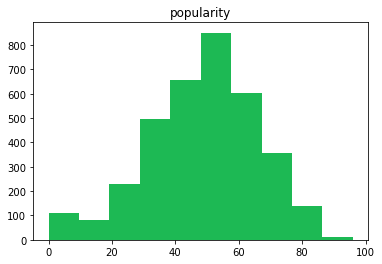

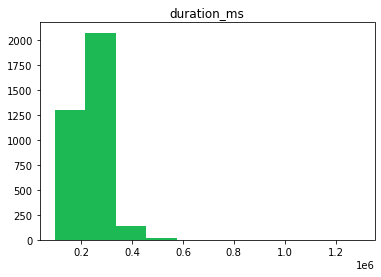

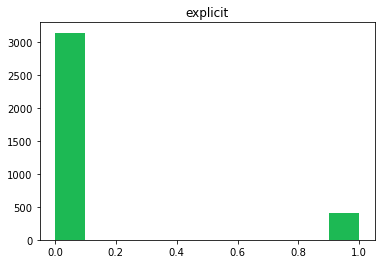

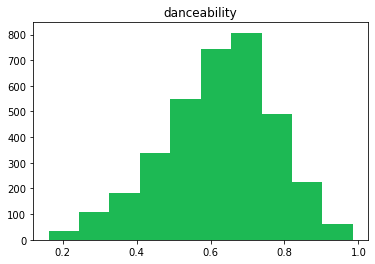

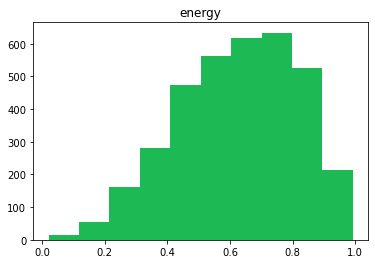

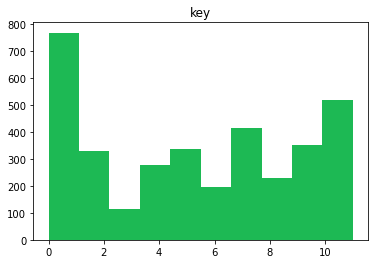

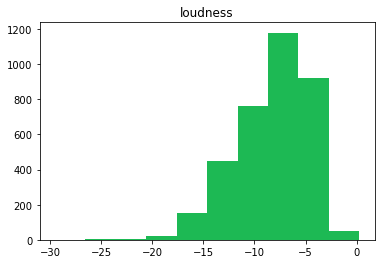

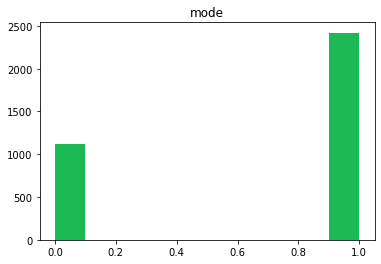

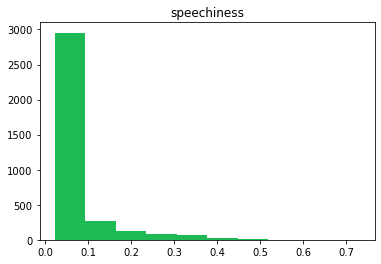

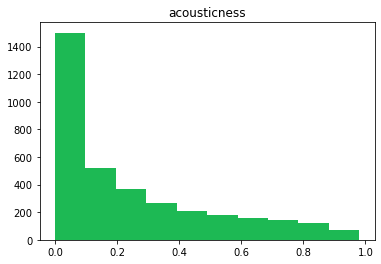

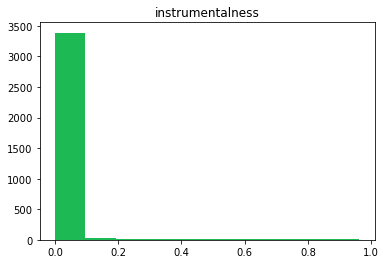

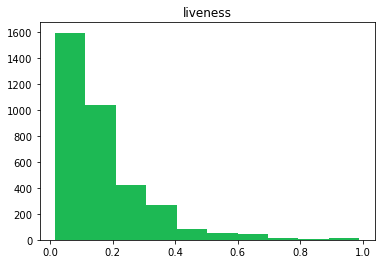

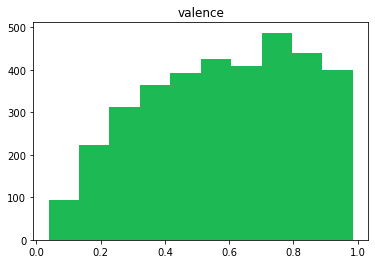

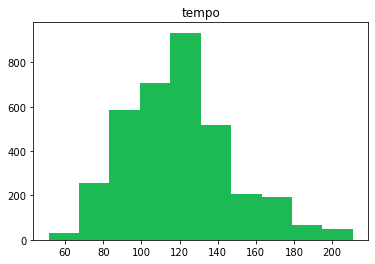

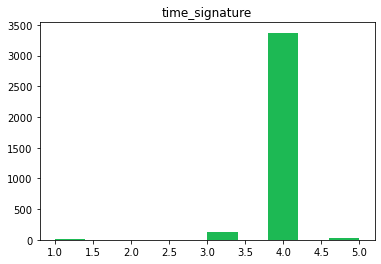

In [42]:
#plotting a histogram for the column values
for column in num_cols:
    plt.title(column)
    spotify_green = '#1db954'
    plt.hist(df[column], color = spotify_green)
    plt.show()

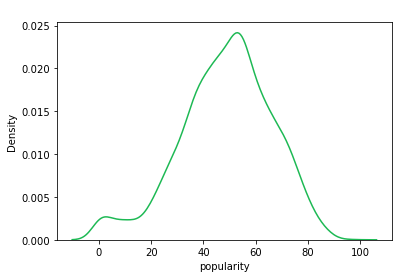

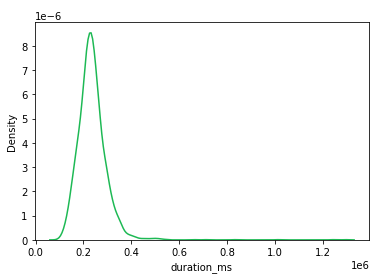

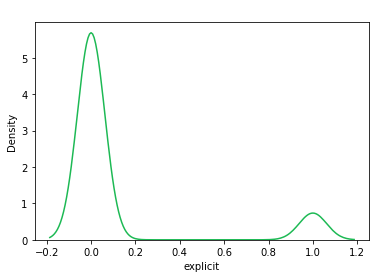

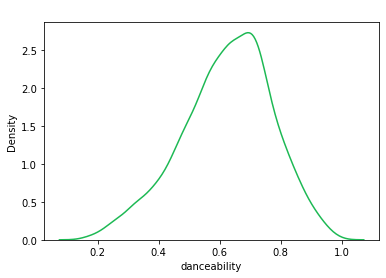

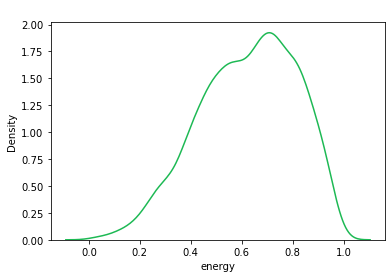

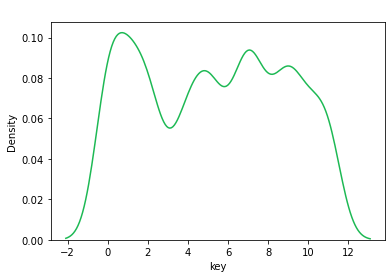

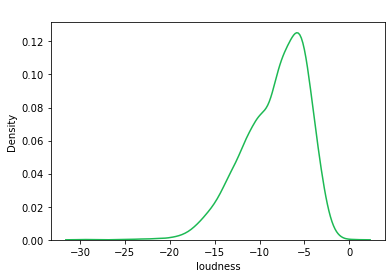

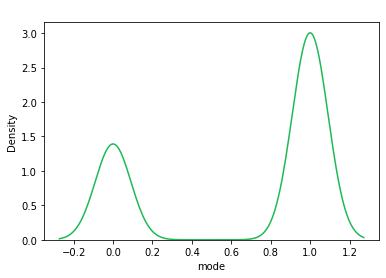

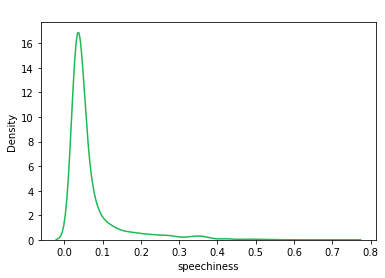

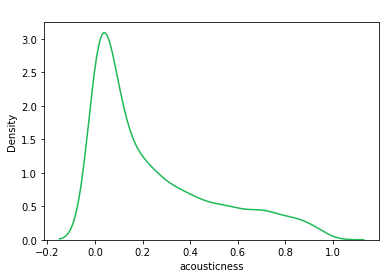

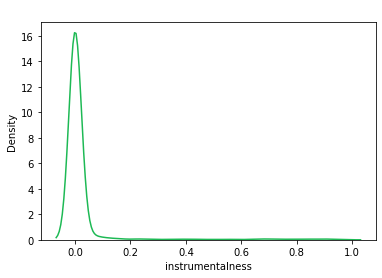

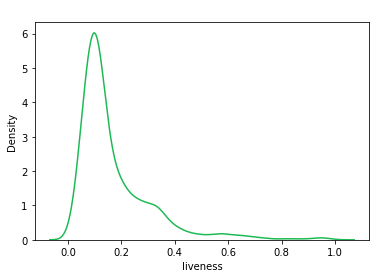

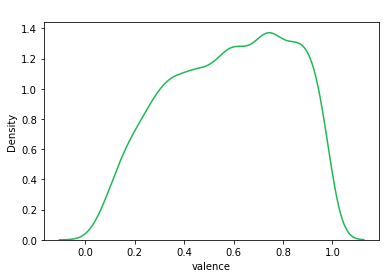

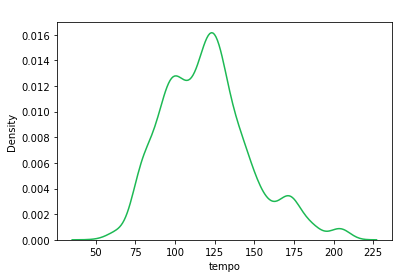

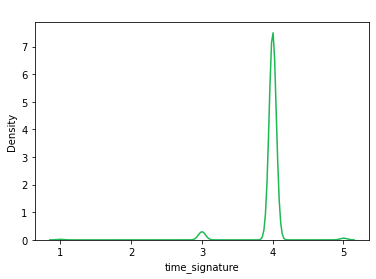

In [43]:
#using sns kdeplot for visualization
for column in num_cols:
    plt.title(column, color = '#ffffff')
    sns.kdeplot(df[column], color=spotify_green)
    plt.show()

In [44]:
print(df.columns)
"""df['year'] = pd.to_numeric(df['release_date'].str[:4])
df['year'].unique()"""

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


"df['year'] = pd.to_numeric(df['release_date'].str[:4])\ndf['year'].unique()"

In [45]:
"""
df['year'] = pd.to_numeric(df['release_date'].str[:4])
df['year'].unique()
"""

"\ndf['year'] = pd.to_numeric(df['release_date'].str[:4])\ndf['year'].unique()\n"

In [46]:
songs_path = 'complete_song_data.csv'
df_year = pd.read_csv(songs_path, usecols=['release_date', 'energy'])

In [47]:
df_year['year'] = pd.to_numeric(df_year['release_date'].str[:4])
df_year['year'].unique()

array([1959, 1960, 1962, 1961, 1964, 1963, 1997, 1987, 1965, 1996, 1968,
       1966, 2000, 2011, 1967, 1969, 1970, 1971, 1972, 1974, 1973, 1975,
       1991, 1982, 1976, 1977, 1978, 1979, 1980, 2002, 1988, 1981, 2012,
       2006, 1983, 1993, 1990, 1995, 1984, 1985, 1986, 1992, 1989, 1998,
       1994, 2003, 1999, 2001, 2013, 2004, 2005, 2007, 2008, 2009, 2010,
       2014, 2017, 2015, 2016, 2018, 2019, 2020, 2021, 1956, 1957, 1958],
      dtype=int64)

In [48]:
#finding the correlation between the year of song released v/s the energy
correlation = df_year['year'].corr(df_year['energy'])
print(correlation)


0.25510313858239064


In [49]:
#mapping = df_year.groupby('year')['energy'].mean().to_dict()
#print(mapping)

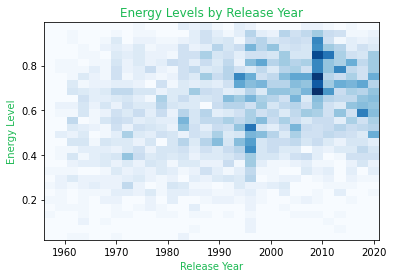

In [50]:
# create the figure and axis objects
fig, ax = plt.subplots()

# plot the histogram
ax.hist2d(df_year['year'], df_year['energy'], bins=(30, 30), cmap=plt.cm.Blues)

# set the axis labels and title
ax.set_xlabel('Release Year', color = spotify_green)
ax.set_ylabel('Energy Level', color = spotify_green)
ax.set_title('Energy Levels by Release Year', color = spotify_green)

# display the plot
plt.show()

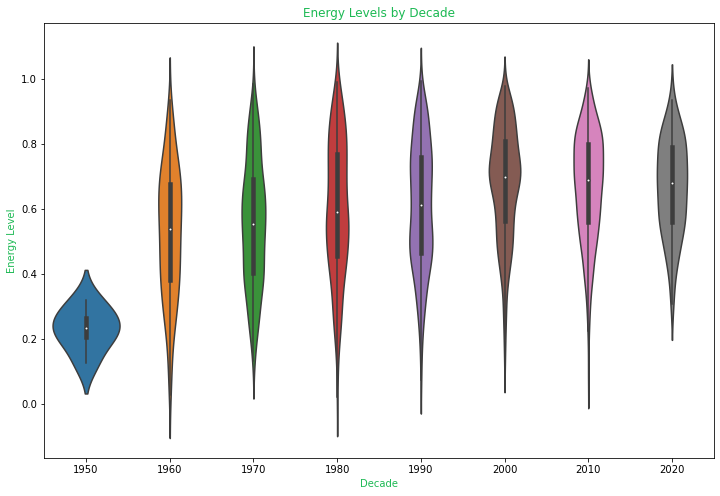

In [51]:
#visualizing energy level by each decade
df_year['decade'] = (df_year['year'] // 10) * 10
df_grouped = df_year.groupby('decade')

# Create violin plot for each decade
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(x='decade', y='energy', data=df_year, ax=ax, split=True)
plt.title('Energy Levels by Decade', color = spotify_green)
plt.xlabel('Decade', color = spotify_green)
plt.ylabel('Energy Level', color = spotify_green)
plt.show()

In [52]:
corr = df.corr()

In [53]:
corr['popularity'][np.absolute(corr['popularity'])>0.1].sort_values(ascending = False)

popularity      1.000000
loudness        0.199659
explicit        0.196896
speechiness     0.100085
acousticness   -0.149748
Name: popularity, dtype: float64

[Text(0, 0.5, 'popularity'),
 Text(0, 1.5, 'duration_ms'),
 Text(0, 2.5, 'explicit'),
 Text(0, 3.5, 'danceability'),
 Text(0, 4.5, 'energy'),
 Text(0, 5.5, 'key'),
 Text(0, 6.5, 'loudness'),
 Text(0, 7.5, 'mode'),
 Text(0, 8.5, 'speechiness'),
 Text(0, 9.5, 'acousticness'),
 Text(0, 10.5, 'instrumentalness'),
 Text(0, 11.5, 'liveness'),
 Text(0, 12.5, 'valence'),
 Text(0, 13.5, 'tempo'),
 Text(0, 14.5, 'time_signature')]

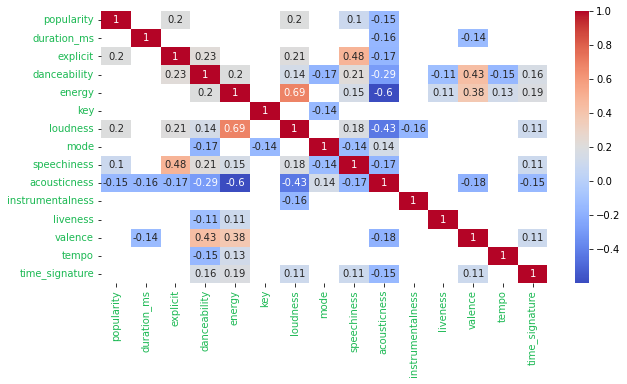

In [54]:
fig, ax = plt.subplots(figsize= (10,5))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), color= spotify_green)
ax.set_yticklabels(ax.get_yticklabels(), color= spotify_green)

In [55]:
# !pip install catboost
# !pip install xgboost

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings              
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")

In [58]:
features_columns = corr['popularity'].index.to_list()

print(f'Features used: {features_columns}')
print('')

X = df[features_columns].drop(['popularity'],axis = 1)
y = df['popularity']

reduce_mem_usage(X)

Features used: ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

Memory usage of properties dataframe is : 0.378448486328125  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  0.14875030517578125  MB
This is  39.30529795984195 % of the initial size


In [59]:
#splitting the training and testing data and checking the shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

del X, y

print(f'X_y_train shape: {X_train.shape} {y_train.shape}' )
print(f'X_y_test shape: {X_test.shape} {y_test.shape}' )

X_y_train shape: (2833, 14) (2833,)
X_y_test shape: (709, 14) (709,)


In [60]:
# !pip install optuna

In [61]:
def objective(trial):
    
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'early_stopping_rounds': 100
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

In [62]:
#dataset after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        3542 non-null   int64  
 1   duration_ms       3542 non-null   int64  
 2   explicit          3542 non-null   int64  
 3   danceability      3542 non-null   float64
 4   energy            3542 non-null   float64
 5   key               3542 non-null   int64  
 6   loudness          3542 non-null   float64
 7   mode              3542 non-null   int64  
 8   speechiness       3542 non-null   float64
 9   acousticness      3542 non-null   float64
 10  instrumentalness  3542 non-null   float64
 11  liveness          3542 non-null   float64
 12  valence           3542 non-null   float64
 13  tempo             3542 non-null   float64
 14  time_signature    3542 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 415.2 KB


In [63]:
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,27,237867,0,0.271,0.208,0,-11.220,1,0.0314,0.90000,0.000107,0.334,0.112,87.551,3
1,45,118467,0,0.582,0.289,1,-14.339,1,0.0465,0.51800,0.000000,0.107,0.743,80.750,4
2,39,135067,0,0.659,0.342,5,-13.709,1,0.0353,0.77700,0.000013,0.248,0.677,112.878,3
3,38,157547,0,0.508,0.611,7,-7.901,0,0.0418,0.54100,0.000000,0.340,0.733,123.380,4
4,32,157296,0,0.526,0.555,7,-9.523,0,0.0456,0.53200,0.000000,0.388,0.736,123.615,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,54,234213,0,0.653,0.623,6,-5.273,0,0.0820,0.25300,0.000000,0.144,0.401,123.999,4
3538,51,212575,0,0.584,0.672,11,-7.539,0,0.0723,0.00313,0.000004,0.372,0.319,145.790,4
3539,60,187973,0,0.444,0.819,10,-4.078,0,0.3410,0.10600,0.000000,0.107,0.747,82.695,4
3540,60,187973,0,0.444,0.819,10,-4.078,0,0.3410,0.10600,0.000000,0.107,0.747,82.695,4


# Model 1: DNN

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow import keras

# set a popularity threshold to classify songs as popular or not popular
threshold = 70
X = df[['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = df['popularity'].apply(lambda x: 1 if x >= threshold else 0)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# build the neural network
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              15360     
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)               

In [65]:
# compile the model with binary cross-entropy loss and L1/L2 regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
89/89 [==============================] - 4s 20ms/step - loss: 124.4712 - accuracy: 0.7875 - val_loss: 30.1236 - val_accuracy: 0.8731
Epoch 2/20
89/89 [==============================] - 1s 17ms/step - loss: 50.6806 - accuracy: 0.7833 - val_loss: 12.4572 - val_accuracy: 0.8731
Epoch 3/20
89/89 [==============================] - 1s 17ms/step - loss: 17.9667 - accuracy: 0.7903 - val_loss: 17.6871 - val_accuracy: 0.8731
Epoch 4/20
89/89 [==============================] - 1s 17ms/step - loss: 12.0436 - accuracy: 0.7882 - val_loss: 9.1049 - val_accuracy: 0.8731
Epoch 5/20
89/89 [==============================] - 1s 17ms/step - loss: 9.9117 - accuracy: 0.7988 - val_loss: 8.8903 - val_accuracy: 0.8731
Epoch 6/20
89/89 [==============================] - 1s 17ms/step - loss: 8.8054 - accuracy: 0.8637 - val_loss: 8.5752 - val_accuracy: 0.8731
Epoch 7/20
89/89 [==============================] - 1s 16ms/step - loss: 8.5081 - accuracy: 0.8800 - val_loss: 8.4065 - val_accuracy: 0.8731
Epoch

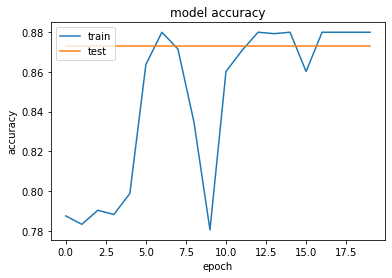

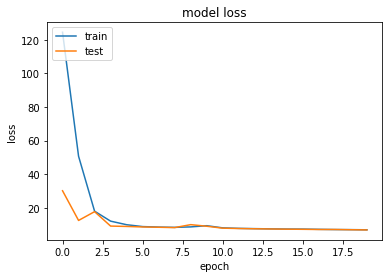

In [66]:
import matplotlib.pyplot as plt

def history_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
     # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
history_plot(history)

In [69]:
# test
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

23/23 [==============================] - 0s 4ms/step - loss: 6.8197 - accuracy: 0.8731
Test loss: 6.819714546203613
Test accuracy: 0.8730606436729431


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
preds = model.predict(X_test)
y_pred = (preds >= 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

23/23 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       619
           1       0.00      0.00      0.00        90

    accuracy                           0.87       709
   macro avg       0.44      0.50      0.47       709
weighted avg       0.76      0.87      0.81       709



C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


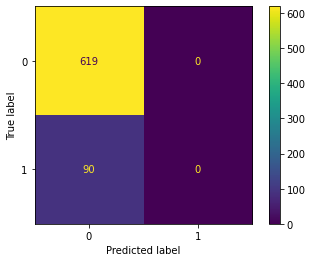

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#displaying classification report to check model accuracy
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [74]:
# calculate the correlation coefficients between each pair of input features
corr_coeffs = np.corrcoef(X_test, rowvar=False)
corr_coeffs = corr_coeffs[np.triu_indices(X_test.shape[1], k=1)]

# print the features with the highest correlation coefficients
corr_argsort = np.argsort(np.abs(corr_coeffs))[::-1]
print("Features with the highest correlation coefficients:")
for i in range(10):
    idx1, idx2 = np.unravel_index(corr_argsort[i], (X_test.shape[1], X_test.shape[1]))
    print("\033[1m\033[32m{} and {}: {:.3f}\033[0m".format(X_test.columns[idx1], X_test.columns[idx2], corr_coeffs[corr_argsort[i]]))

Features with the highest correlation coefficients:
danceability and instrumentalness: 0.661
danceability and tempo: -0.617
explicit and key: 0.566
danceability and loudness: 0.443
key and explicit: -0.404
energy and explicit: 0.353
danceability and danceability: -0.274
explicit and valence: 0.248
danceability and duration_ms: -0.247
explicit and danceability: 0.239


# Model 2: DNN with different parameters

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# set a popularity threshold to classify songs as popular or not popular
threshold = 70
X = df[['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = df['popularity'].apply(lambda x: 1 if x >= threshold else 0)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# build the neural network
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
#model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
#model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
#model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               3840      
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 47,617
Trainable params: 47,617
Non-trai

In [76]:
# compile the model with binary cross-entropy loss and L1/L2 regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
89/89 [==============================] - 3s 7ms/step - loss: 296.2114 - accuracy: 0.7928 - val_loss: 28.0151 - val_accuracy: 0.1227
Epoch 2/20
89/89 [==============================] - 0s 4ms/step - loss: 89.2643 - accuracy: 0.7766 - val_loss: 146.5350 - val_accuracy: 0.8773
Epoch 3/20
89/89 [==============================] - 0s 4ms/step - loss: 83.5857 - accuracy: 0.8002 - val_loss: 14.9966 - val_accuracy: 0.8773
Epoch 4/20
89/89 [==============================] - 0s 4ms/step - loss: 20.1635 - accuracy: 0.7984 - val_loss: 17.6971 - val_accuracy: 0.8773
Epoch 5/20
89/89 [==============================] - 0s 4ms/step - loss: 45.9840 - accuracy: 0.7794 - val_loss: 36.6534 - val_accuracy: 0.8773
Epoch 6/20
89/89 [==============================] - 0s 4ms/step - loss: 29.6512 - accuracy: 0.7935 - val_loss: 15.2245 - val_accuracy: 0.8773
Epoch 7/20
89/89 [==============================] - 0s 3ms/step - loss: 18.9252 - accuracy: 0.7921 - val_loss: 20.1885 - val_accuracy: 0.8773
Epoc

In [77]:
# test
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

23/23 [==============================] - 0s 2ms/step - loss: 1.6624 - accuracy: 0.8773
Test loss: 1.6624008417129517
Test accuracy: 0.8772919774055481


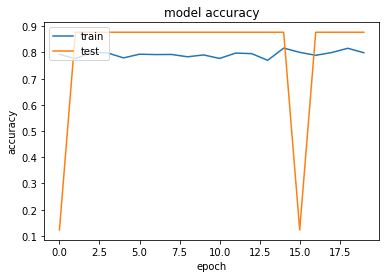

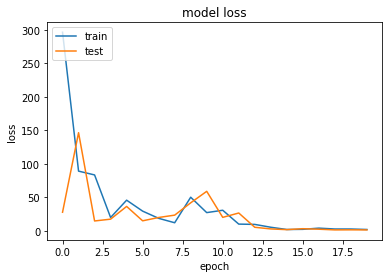

In [78]:
import matplotlib.pyplot as plt

def history_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
     # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
history_plot(history)

In [80]:
preds = model.predict(X_test)
y_pred = (preds >= 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

23/23 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.88      1.00      0.93       622
           1       0.00      0.00      0.00        87

    accuracy                           0.88       709
   macro avg       0.44      0.50      0.47       709
weighted avg       0.77      0.88      0.82       709



C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


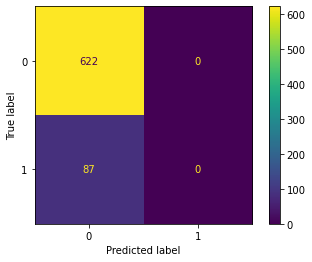

In [81]:
#displaying classification report to check model accuracy
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

# Model 2: MLP

In [82]:
#importing MLP classifier
from sklearn.neural_network import MLPClassifier

#implementing MLP with 2 hidden layers
clf = MLPClassifier(random_state=1, hidden_layer_sizes = (100,100), max_iter=300).fit(X_train, y_train)

#predictions
y_pred = clf.predict(X_test)

In [83]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [84]:
#finding the accuracy after testing the model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.1227080394922426


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       622
           1       0.12      1.00      0.22        87

    accuracy                           0.12       709
   macro avg       0.06      0.50      0.11       709
weighted avg       0.02      0.12      0.03       709



C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\attor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


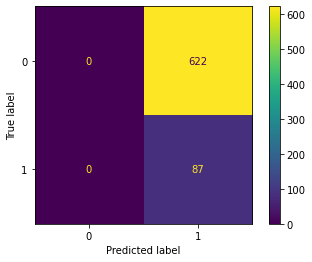

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#displaying classification report to check model accuracy
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [86]:
average_duration = df['duration_ms'].mean()
print(f"The average duration of songs in the dataset is {average_duration:.2f} milliseconds.")


The average duration of songs in the dataset is 236497.26 milliseconds.
